In [1160]:
import pandas as pd
import urllib.request
import numpy as np 
# !conda install -c conda-forge geocoder --yes
# !conda install -c conda-forge geopy


## Retreive Wisconsin location data from API

In [1161]:
url = 'https://public.opendatasoft.com/api/records/1.0/search/?dataset=us-zip-code-latitude-and-longitude&q=&rows=1025&facet=state&facet=timezone&facet=dst&refine.state=WI'

results = requests.get(url).json()
results

{'nhits': 940,
 'parameters': {'dataset': 'us-zip-code-latitude-and-longitude',
  'timezone': 'UTC',
  'rows': 1025,
  'format': 'json',
  'facet': ['state', 'timezone', 'dst']},
 'records': [{'datasetid': 'us-zip-code-latitude-and-longitude',
   'recordid': 'ec76f0ce0e8d99b02e0ec6cb9fd578904a2291a0',
   'fields': {'city': 'Readfield',
    'zip': '54969',
    'dst': 1,
    'geopoint': [44.269991, -88.775457],
    'longitude': -88.775457,
    'state': 'WI',
    'latitude': 44.269991,
    'timezone': -6},
   'geometry': {'type': 'Point', 'coordinates': [-88.775457, 44.269991]},
   'record_timestamp': '2018-02-09T16:33:38.603000+00:00'},
  {'datasetid': 'us-zip-code-latitude-and-longitude',
   'recordid': '8418e27e80505070bf0ed2e94c98419f477c9814',
   'fields': {'city': 'Mount Sterling',
    'zip': '54645',
    'dst': 1,
    'geopoint': [43.31493, -90.9287],
    'longitude': -90.9287,
    'state': 'WI',
    'latitude': 43.31493,
    'timezone': -6},
   'geometry': {'type': 'Point', 'coord

In [1162]:
# assign relevant part of JSON 
wi_zips = results['records']

wi_zips
# tranform zip code file into a dataframe
wi_zipsdataframe = pd.json_normalize(wi_zips)
wi_zipsdataframe.head()

datasetid  \
0  us-zip-code-latitude-and-longitude   
1  us-zip-code-latitude-and-longitude   
2  us-zip-code-latitude-and-longitude   
3  us-zip-code-latitude-and-longitude   
4  us-zip-code-latitude-and-longitude   

                                   recordid                  record_timestamp  \
0  ec76f0ce0e8d99b02e0ec6cb9fd578904a2291a0  2018-02-09T16:33:38.603000+00:00   
1  8418e27e80505070bf0ed2e94c98419f477c9814  2018-02-09T16:33:38.603000+00:00   
2  f434de08bce3c166db96b0618c2ff6b1d862290b  2018-02-09T16:33:38.603000+00:00   
3  ebf7ca9697077c900d3a97db732f1208aedfe249  2018-02-09T16:33:38.603000+00:00   
4  e02d1993bb14fc5a9414bf9935457706ebe97991  2018-02-09T16:33:38.603000+00:00   

      fields.city fields.zip  fields.dst          fields.geopoint  \
0       Readfield      54969           1  [44.269991, -88.775457]   
1  Mount Sterling      54645           1     [43.31493, -90.9287]   
2          Merton      53056           1   [43.146023, -88.30975]   
3          Odanah      54861           1   [46.599122, -90.65361]   
4        Montreal      54550           1   [46.410758, -90.25072]   

   fields.longitude fields.state  fields.latitude  fields.timezone  \
0        -88.775457           WI        44.269991               -6   
1        -90.928700           WI        43.314930               -6   
2        -88.309750           WI        43.146023               -6   
3        -90.653610           WI        46.599122               -6   
4        -90.250720           WI        46.410758               -6   

  geometry.type     geometry.coordinates  
0         Point  [-88.775457, 44.269991]  
1         Point     [-90.9287, 43.31493]  
2         Point   [-88.30975, 43.146023]  
3         Point   [-90.65361, 46.599122]  
4         Point   [-90.25072, 46.410758]

### Clean up the dataframe with just the columns we need

In [1163]:
col_names = ['Zip', 'City', 'Latitude', 'Longitude']
df_wi = pd.DataFrame(columns = col_names)

df_wi['Zip'] = wi_zipsdataframe["fields.zip"].values
df_wi['City'] = wi_zipsdataframe['fields.city'].values
df_wi['Latitude'] = wi_zipsdataframe['fields.latitude'].values
df_wi['Longitude'] = wi_zipsdataframe['fields.longitude'].values

In [1164]:
df_wi.head()

Zip            City   Latitude  Longitude
0  54969       Readfield  44.269991 -88.775457
1  54645  Mount Sterling  43.314930 -90.928700
2  53056          Merton  43.146023 -88.309750
3  54861          Odanah  46.599122 -90.653610
4  54550        Montreal  46.410758 -90.250720

## Retreive Minnesota location data from API

In [1165]:
url = 'https://public.opendatasoft.com/api/records/1.0/search/?dataset=us-zip-code-latitude-and-longitude&q=&rows=1025&facet=state&facet=timezone&facet=dst&refine.state=MN'

results = requests.get(url).json()
results

{'nhits': 1054,
 'parameters': {'dataset': 'us-zip-code-latitude-and-longitude',
  'timezone': 'UTC',
  'rows': 1025,
  'format': 'json',
  'facet': ['state', 'timezone', 'dst']},
 'records': [{'datasetid': 'us-zip-code-latitude-and-longitude',
   'recordid': 'ed12cbacde531be4a3c94f5e839e114b26337309',
   'fields': {'city': 'Andover',
    'zip': '55304',
    'dst': 1,
    'geopoint': [45.254715, -93.28652],
    'longitude': -93.28652,
    'state': 'MN',
    'latitude': 45.254715,
    'timezone': -6},
   'geometry': {'type': 'Point', 'coordinates': [-93.28652, 45.254715]},
   'record_timestamp': '2018-02-09T16:33:38.603000+00:00'},
  {'datasetid': 'us-zip-code-latitude-and-longitude',
   'recordid': '4aa0ece0cb0898af5d761bf95f74680901578527',
   'fields': {'city': 'Minneapolis',
    'zip': '55422',
    'dst': 1,
    'geopoint': [45.014764, -93.33965],
    'longitude': -93.33965,
    'state': 'MN',
    'latitude': 45.014764,
    'timezone': -6},
   'geometry': {'type': 'Point', 'coordina

In [1166]:
# assign relevant part of JSON
mn_zips = results['records']

mn_zips
# tranform venues into a dataframe
mn_zipsdataframe = pd.json_normalize(mn_zips)
mn_zipsdataframe.head()

datasetid  \
0  us-zip-code-latitude-and-longitude   
1  us-zip-code-latitude-and-longitude   
2  us-zip-code-latitude-and-longitude   
3  us-zip-code-latitude-and-longitude   
4  us-zip-code-latitude-and-longitude   

                                   recordid                  record_timestamp  \
0  ed12cbacde531be4a3c94f5e839e114b26337309  2018-02-09T16:33:38.603000+00:00   
1  4aa0ece0cb0898af5d761bf95f74680901578527  2018-02-09T16:33:38.603000+00:00   
2  2a78b30331ab82d4a02f6a6f130eb86374779e26  2018-02-09T16:33:38.603000+00:00   
3  779556c4c2c97d26f1a08d70ba7e2a2112835933  2018-02-09T16:33:38.603000+00:00   
4  0ab35d21253ebe22bff764529d07ad77b3815783  2018-02-09T16:33:38.603000+00:00   

   fields.city fields.zip  fields.dst         fields.geopoint  \
0      Andover      55304           1  [45.254715, -93.28652]   
1  Minneapolis      55422           1  [45.014764, -93.33965]   
2       Delano      55328           1  [45.032489, -93.79591]   
3  Maple Plain      55578           1  [45.015914, -93.47188]   
4        Osseo      55311           1  [45.102133, -93.48757]   

   fields.longitude fields.state  fields.latitude  fields.timezone  \
0         -93.28652           MN        45.254715               -6   
1         -93.33965           MN        45.014764               -6   
2         -93.79591           MN        45.032489               -6   
3         -93.47188           MN        45.015914               -6   
4         -93.48757           MN        45.102133               -6   

  geometry.type    geometry.coordinates  
0         Point  [-93.28652, 45.254715]  
1         Point  [-93.33965, 45.014764]  
2         Point  [-93.79591, 45.032489]  
3         Point  [-93.47188, 45.015914]  
4         Point  [-93.48757, 45.102133]

### Clean up dataframe and select just the columns we need

In [1167]:
col_names = ['Zip', 'City', 'Latitude', 'Longitude']
df_mn = pd.DataFrame(columns = col_names)

df_mn['Zip'] = mn_zipsdataframe["fields.zip"].values
df_mn['City'] = mn_zipsdataframe['fields.city'].values
df_mn['Latitude'] = mn_zipsdataframe['fields.latitude'].values
df_mn['Longitude'] = mn_zipsdataframe['fields.longitude'].values

In [1168]:
df_mn.head()

Zip         City   Latitude  Longitude
0  55304      Andover  45.254715  -93.28652
1  55422  Minneapolis  45.014764  -93.33965
2  55328       Delano  45.032489  -93.79591
3  55578  Maple Plain  45.015914  -93.47188
4  55311        Osseo  45.102133  -93.48757

In [1169]:
import random 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

***
***
***

# <span style="color:orange"> Wisconsin </span>  

### Distribution of zip codes across the state with simple scatter plot
### Hard to tell where zipe codes are more densly located and where more sparce

Text(0.5, 1.0, 'Distribution of Wisconsin Zip Codes')

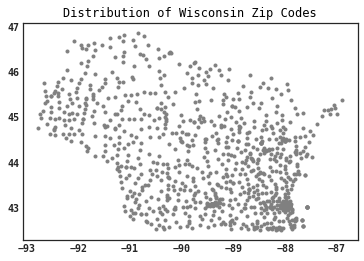

In [1170]:
X = df_wi[['Longitude', 'Latitude']]
plt.scatter(X['Longitude'], X['Latitude'], marker='.', color='gray')
plt.title("Distribution of Wisconsin Zip Codes")

## We can use K-means clustering on just latitudes and longtitudes to see if zipe codes follow a pattern
### K-means separates zip codes evenly by geography, not by density
### See that one cluster is twice the size of the other two cluster
### This larger cluster includes both Madison and Milwaukee

In [1171]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means.fit(X)
y_kmeans = k_means.predict(X)
k_means_labels = k_means.labels_
k_means_labels

k_means_cluster_centers = k_means.cluster_centers_
print(k_means_cluster_centers)

[[-91.25296051  45.39333522]
 [-88.29622818  43.8013147 ]
 [-89.96492079  43.42228107]]


### Show counts for each cluster

In [1172]:
(unique, counts) = np.unique(k_means_labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[  0 243]
 [  1 431]
 [  2 266]]


### Zip codes plotted by cluster. One cluster for Milwaukee and eastern cities, one cluster for Madison and surrounding areas, and one cluster for the north west like Eau Claire and La Crosse. 

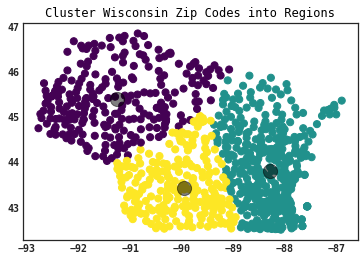

In [1173]:
plt.scatter(X['Longitude'], X['Latitude'], c=y_kmeans, s=50, cmap='viridis' )
plt.title('Cluster Wisconsin Zip Codes into Regions')
centers = k_means_cluster_centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Import folium and get set up

In [1174]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from IPython.display import Image 
from IPython.core.display import HTML 

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# !conda install -c conda-forge folium=0.5.0 --yes   ## install if necesary 
import folium # plotting library


## Initialize folium map and plot Wisconsin zip codes on it
### This map makes it easier to see that Madison/Dane County and 
### Milwaukee have a concentration of zip codes relative to other 
### parts of the state

In [1175]:
venues_map = folium.Map(location=[43.7844 , -88.7879], zoom_start=7)


for lat, lng, label in zip(df_wi.Latitude, df_wi.Longitude, df_wi.City):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='darkgray',
        popup=label,
        fill = True,
        fill_color='lightgray',
        fill_opacity=0.9
    ).add_to(venues_map)

# display map
venues_map

# <span style="color:orange"> Minnesota </span>  

Text(0.5, 1.0, 'Distribution of Minnesota Zip Codes')

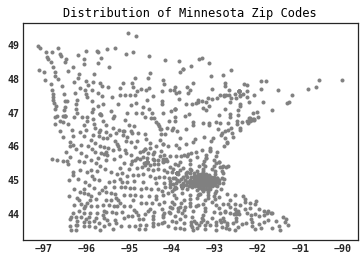

In [1176]:
X = df_mn[['Longitude', 'Latitude']]
plt.scatter(X['Longitude'], X['Latitude'], marker='.', color='gray')
plt.title("Distribution of Minnesota Zip Codes")

In [1177]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means.fit(X)
y_kmeans = k_means.predict(X)
k_means_labels = k_means.labels_
k_means_labels

k_means_cluster_centers = k_means.cluster_centers_
print(k_means_cluster_centers)

[[-93.80061333  44.67732052]
 [-92.95423998  47.13665144]
 [-95.7963641   46.87427392]]


### Display counts for each cluster

In [1178]:
(unique, counts) = np.unique(k_means_labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[  0 629]
 [  1 160]
 [  2 236]]


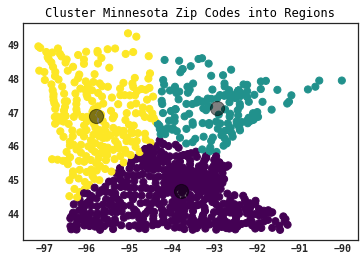

In [1179]:
plt.scatter(X['Longitude'], X['Latitude'], c=y_kmeans, s=50, cmap='viridis' )
plt.title('Cluster Minnesota Zip Codes into Regions')
centers = k_means_cluster_centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Create Folium map of Minnesota with zip codes plotted

In [1180]:
venues_map = folium.Map(location=[46.7296 , -94.6859], zoom_start=7)

for lat, lng, label in zip(df_mn.Latitude, df_mn.Longitude, df_mn.City):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='darkgray',
        popup=label,
        fill = True,
        fill_color='lightgray',
        fill_opacity=0.9
    ).add_to(venues_map)

# display map
venues_map

## Select only the Milwaukee zip codes

In [1181]:
df_milwaukee = df_wi[df_wi['City'].str.contains('Milwaukee')]
df_milwaukee.reset_index(drop= True, inplace = True)
df_milwaukee.head()

Zip       City   Latitude  Longitude
0  53206  Milwaukee  43.076179 -87.934760
1  53224  Milwaukee  43.153865 -88.040320
2  53207  Milwaukee  42.985465 -87.899980
3  53268  Milwaukee  43.038513 -87.909584
4  53218  Milwaukee  43.110960 -87.994360

# Milwaukee Laundries

## Set up search Foursquare query

In [1182]:
CLIENT_ID = 'DTCSBRDEARI5YPHBKTHXXHA2SKQKS0FEOQK0J2L13MQ3T2VE' # your Foursquare ID
CLIENT_SECRET = 'KK20BPB5FXZTBKFIWE0MXLJUS4A3QDZDKK1TY13PHOKDH5DI' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DTCSBRDEARI5YPHBKTHXXHA2SKQKS0FEOQK0J2L13MQ3T2VE
CLIENT_SECRET:KK20BPB5FXZTBKFIWE0MXLJUS4A3QDZDKK1TY13PHOKDH5DI


In [1183]:
search_query = 'Laundry'
radius = 5000
latitude = 43.0389
longitude =  -87.9065

In [1184]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [1185]:
url

'https://api.foursquare.com/v2/venues/search?client_id=DTCSBRDEARI5YPHBKTHXXHA2SKQKS0FEOQK0J2L13MQ3T2VE&client_secret=KK20BPB5FXZTBKFIWE0MXLJUS4A3QDZDKK1TY13PHOKDH5DI&ll=43.0389,-87.9065&v=20180604&query=Laundry&radius=5000&limit=100'

## Query results as json 

In [1186]:
results1 = requests.get(url).json()
results1

{'meta': {'code': 200, 'requestId': '5ee80573f55e2f54f10b684d'},
 'response': {'venues': [{'id': '4e108e7d7d8b4d5613d2a95c',
    'name': 'City Hall Square Laundry Room',
    'location': {'lat': 43.04014536420271,
     'lng': -87.9107609000337,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.04014536420271,
       'lng': -87.9107609000337}],
     'distance': 373,
     'cc': 'US',
     'city': 'Milwaukee',
     'state': 'WI',
     'country': 'United States',
     'formattedAddress': ['Milwaukee, WI', 'United States']},
    'categories': [{'id': '4bf58dd8d48988d1fc941735',
      'name': 'Laundry Service',
      'pluralName': 'Laundry Services',
      'shortName': 'Laundry',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/laundry_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1592264113',
    'hasPerk': False},
   {'id': '4f80e1dae4b042dc213d6fd6',
    'name': 'JVG Laundry Room',
    'location': {'address': 'Jefferson',
     

## Convert json file to pandas dataframe

In [1187]:
# assign relevant part of JSON to venues
venues = results1['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


id                           name  \
0  4e108e7d7d8b4d5613d2a95c  City Hall Square Laundry Room   
1  4f80e1dae4b042dc213d6fd6               JVG Laundry Room   
2  4b92f526f964a520702a34e3                   Coin Laundry   
3  4bc79b508b7c9c74adcd36cf    Marquette Tanning & Laundry   
4  4ae30936f964a520079021e3  East Side Maytag Coin Laundry   

                                          categories    referralId  hasPerk  \
0  [{'id': '4bf58dd8d48988d1fc941735', 'name': 'L...  v-1592264113    False   
1  [{'id': '4d954b06a243a5684965b473', 'name': 'R...  v-1592264113    False   
2  [{'id': '4bf58dd8d48988d1fc941735', 'name': 'L...  v-1592264113    False   
3  [{'id': '4d1cf8421a97d635ce361c31', 'name': 'T...  v-1592264113    False   
4  [{'id': '4bf58dd8d48988d1fc941735', 'name': 'L...  v-1592264113    False   

   location.lat  location.lng  \
0     43.040145    -87.910761   
1     43.047687    -87.905751   
2     43.053188    -87.898415   
3     43.040577    -87.932976   
4     43.058270    -87.884900   

                             location.labeledLatLngs  location.distance  \
0  [{'label': 'display', 'lat': 43.04014536420271...                373   
1  [{'label': 'display', 'lat': 43.04768657543590...                980   
2  [{'label': 'entrance', 'lat': 43.053079, 'lng'...               1721   
3  [{'label': 'display', 'lat': 43.04057667860513...               2162   
4  [{'label': 'display', 'lat': 43.05827, 'lng': ...               2781   

  location.cc location.city location.state location.country  \
0          US     Milwaukee             WI    United States   
1          US     Milwaukee             WI    United States   
2          US     Milwaukee             WI    United States   
3          US     Milwaukee             WI    United States   
4          US     Milwaukee             WI    United States   

                           location.formattedAddress      location.address  \
0                     [Milwaukee, WI, United States]                   NaN   
1  [Jefferson (Ogden), Milwaukee, WI 53202, Unite...             Jefferson   
2  [1701 N Humboldt Ave (at Brady St.), Milwaukee...   1701 N Humboldt Ave   
3  [811 N 16th St (at Wells), Milwaukee, WI 53233...         811 N 16th St   
4  [2009 E Kenilworth Pl (at N Prospect Ave.), Mi...  2009 E Kenilworth Pl   

  location.crossStreet location.postalCode venuePage.id  
0                  NaN                 NaN          NaN  
1                Ogden               53202          NaN  
2         at Brady St.               53202          NaN  
3             at Wells               53233          NaN  
4   at N Prospect Ave.               53202    100808707

## Clean up dataframe

In [1188]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

name  \
0        City Hall Square Laundry Room   
1                     JVG Laundry Room   
2                         Coin Laundry   
3          Marquette Tanning & Laundry   
4        East Side Maytag Coin Laundry   
5                     JVT Laundry Room   
6             Yankee Hill Laundry Room   
7   Plaza Hotel and Apartments Laundry   
8             Cass Street Laundry Room   
9                         Laundry Room   
10                 Avenue Coin Laundry   
11                        Laundry Room   
12               Big Load Coin Laundry   
13                    ST JAMES LAUNDRY   
14                             Laundry   
15                        laundry room   
16       Wolf's Dry Cleaners & Laundry   
17        Carpenter tower laundry room   
18    Mount the Rooster's Coup Laundry   
19                        Coin Laundry   
20                         Laundry Mat   
21                   The Laundry Chute   
22                 Royal Plaza Laundry   
23                   Marquette Laundry   
24                24 Hour Coin Laundry   
25                 Maytag Coin Laundry   
26       North Avenue Big Load Laundry   
27              McCormick Laundry Room   
28         Cambridge Apts Laundry Room   
29               Basement/laundry Room   
30                    Big Load Laundry   
31                Koala-T Coin Laundry   
32               Lake Summit Laundry 2   
33                      JVT B Building   
34                        Laundry Matt   
35                        Laundry Room   
36                      Maytag Laundry   
37          Fresh N Clean Laundry Room   
38            12th Street Coin Laundry   
39            Forest Home Coin Laundry   
40                      The Buckingham   
41                 Speed Queen Laundry   
42                        coin laundry   
43             Riverworks Coin Laundry   
44            Third floor laundry room   
45              Sandburg North Laundry   
46               Sandburg Laundry Room   
47         maytag laundry and cleaners   
48                        Your Laundry   
49                        Coin Laundry   

                                  categories        lat        lng  \
0                            Laundry Service  43.040145 -87.910761   
1   Residential Building (Apartment / Condo)  43.047687 -87.905751   
2                            Laundry Service  43.053188 -87.898415   
3                              Tanning Salon  43.040577 -87.932976   
4                            Laundry Service  43.058270 -87.884900   
5                            Laundry Service  43.044060 -87.905094   
6                                 Laundromat  43.044093 -87.903710   
7                            Laundry Service  43.044475 -87.902519   
8                            Laundry Service  43.046606 -87.901746   
9   Residential Building (Apartment / Condo)  43.022124 -87.911949   
10                           Laundry Service  43.038670 -87.919743   
11                           Laundry Service  43.053658 -87.893036   
12                           Laundry Service  43.082449 -87.914214   
13                           Laundry Service  43.038658 -87.922312   
14                           Laundry Service  43.065399 -87.950493   
15                           Laundry Service  43.015788 -87.907764   
16                           Laundry Service  43.047832 -87.920129   
17                           Laundry Service  43.038971 -87.925813   
18                           Laundry Service  43.052608 -87.895844   
19                           Laundry Service  43.022780 -87.911514   
20                           Laundry Service  43.011460 -87.927484   
21                                      None  43.071124 -87.902068   
22                           Laundry Service  43.053048 -87.890917   
23                           Laundry Service  43.045649 -87.929595   
24                           Laundry Service  43.022728 -87.919583   
25                           Laundry Service  43.040558 -87.932822   
2

In [1189]:
laundry_ll = dataframe_filtered[['lat', 'lng', 'name']]
laundry_ll['name'] = laundry_ll['name'].str.replace("'", "")

laundry_ll.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


lat        lng                           name
0  43.040145 -87.910761  City Hall Square Laundry Room
1  43.047687 -87.905751               JVG Laundry Room
2  43.053188 -87.898415                   Coin Laundry
3  43.040577 -87.932976    Marquette Tanning & Laundry
4  43.058270 -87.884900  East Side Maytag Coin Laundry

## Create a map of Milwaukee and place laundires on the map by latitude and longitude

In [1249]:
laundry_map1 = folium.Map(location=[43.0389, -87.9065], zoom_start=12)

for lat, lng, labels in zip(laundry_ll.lat, laundry_ll.lng, laundry_ll.name):    
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup= labels,
        fill = True,
        fill_color='blue',
        fill_opacity=0.5
    ).add_to(laundry_map1)

# display map
laundry_map1

## Calculate the geographic center of all the laundries in Milwaukee with Haversine formula

In [1191]:
import math

x = 0.0
y = 0.0
z = 0.0

for i, coord in laundry_ll.iterrows():
    latitude = math.radians(coord.lat)
    longitude = math.radians(coord.lng)

    x += math.cos(latitude) * math.cos(longitude)
    y += math.cos(latitude) * math.sin(longitude)
    z += math.sin(latitude)

total = len(laundry_ll)

x = x / total
y = y / total
z = z / total

central_longitude = math.atan2(y, x)
central_square_root = math.sqrt(x * x + y * y)
central_latitude = math.atan2(z, central_square_root)

mean_location = {
    'latitude': math.degrees(central_latitude),
    'longitude': math.degrees(central_longitude)
    }

print(mean_location)
laundry_center_lat = math.degrees(central_latitude)
laundry_center_lng = math.degrees(central_longitude)
print(laundry_center_lat)
print(laundry_center_lng)

{'latitude': 43.04067405714463, 'longitude': -87.91121199326979}
43.04067405714463
-87.91121199326979


## Calculate the distance of each laundry from the geographic center
### Have to convert to radians first

In [1192]:

from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

dataframe_filtered.distance = 0

for i, row in dataframe_filtered.iterrows():
    lat1 = radians(dataframe_filtered.lat[i])
    lon1 = radians(dataframe_filtered.lng[i])
    lat2 = radians(math.degrees(central_latitude))
    lon2 = radians(math.degrees(central_longitude))
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    dataframe_filtered.distance[i] = (R * c)*1000


    
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [1193]:
dataframe_filtered.head(10)

name  \
0       City Hall Square Laundry Room   
1                    JVG Laundry Room   
2                        Coin Laundry   
3         Marquette Tanning & Laundry   
4       East Side Maytag Coin Laundry   
5                    JVT Laundry Room   
6            Yankee Hill Laundry Room   
7  Plaza Hotel and Apartments Laundry   
8            Cass Street Laundry Room   
9                        Laundry Room   

                                 categories        lat        lng  \
0                           Laundry Service  43.040145 -87.910761   
1  Residential Building (Apartment / Condo)  43.047687 -87.905751   
2                           Laundry Service  43.053188 -87.898415   
3                             Tanning Salon  43.040577 -87.932976   
4                           Laundry Service  43.058270 -87.884900   
5                           Laundry Service  43.044060 -87.905094   
6                                Laundromat  43.044093 -87.903710   
7                           Laundry Service  43.044475 -87.902519   
8                           Laundry Service  43.046606 -87.901746   
9  Residential Building (Apartment / Condo)  43.022124 -87.911949   

                                      labeledLatLngs  distance  cc       city  \
0  [{'label': 'display', 'lat': 43.04014536420271...        69  US  Milwaukee   
1  [{'label': 'display', 'lat': 43.04768657543590...       897  US  Milwaukee   
2  [{'label': 'entrance', 'lat': 43.053079, 'lng'...      1737  US  Milwaukee   
3  [{'label': 'display', 'lat': 43.04057667860513...      1769  US  Milwaukee   
4  [{'label': 'display', 'lat': 43.05827, 'lng': ...      2899  US  Milwaukee   
5  [{'label': 'display', 'lat': 43.04406012906676...       623  US  Milwaukee   
6  [{'label': 'display', 'lat': 43.04409305194955...       718  US  Milwaukee   
7  [{'label': 'display', 'lat': 43.044475, 'lng':...       823  US  Milwaukee   
8  [{'label': 'display', 'lat': 43.04660596768212...      1013  US  Milwaukee   
9  [{'label': 'display', 'lat': 43.02212449732655...      2064  US  Milwaukee   

  state        country                                   formattedAddress  \
0    WI  United States                     [Milwaukee, WI, United States]   
1    WI  United States  [Jefferson (Ogden), Milwaukee, WI 53202, Unite...   
2    WI  United States  [1701 N Humboldt Ave (at Brady St.), Milwaukee...   
3    WI  United States  [811 N 16th St (at Wells), Milwaukee, WI 53233...   
4    WI  United States  [2009 E Kenilworth Pl (at N Prospect Ave.), Mi...   
5    WI  United States               [Milwaukee, WI 53202, United States]   
6    WI  United States                     [Milwaukee, WI, United States]   
7    WI  United States  [1007 N Cass St (State St), Milwaukee, WI 5320...   
8    WI  United States      [Cass St, Milwaukee, WI 53202, United States]   
9    WI  United States                     [Milwaukee, WI, United States]   

                address         crossStreet postalCode  \
0                   NaN                 NaN        NaN   
1             Jefferson               Ogden      53202   
2   1701 N Humboldt Ave        at Brady St.      53202   
3         811 N 16th St            at Wells      53233   
4  2009 E Kenilworth Pl  at N Prospect Ave.      53202   
5                   NaN                 NaN      53202   
6                   NaN                 NaN        NaN   
7        1007 N Cass St            State St      53202   
8               Cass St                 NaN      53202   
9                   NaN                 NaN        NaN   

                         id  
0  4e108e7d7d8b4d5613d2a95c  
1  4f80e1dae4b042dc213d6fd6  
2  4b92f526f964a520702a34e3  
3  4bc79b508b7c9c74adcd36cf  
4  4ae30936f964a520079021e3  
5  4fe4546ae4b04d21c31bb422  
6  554e78e8498ee17d5aaeb58f  
7  5589cad0498ed8424080402c  
8  4f4195f9e4b0f960372f2655  
9  51fa95ed498e49825effda12

In [1194]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

## Plot a histogram of distances from each laundry to the geographic center

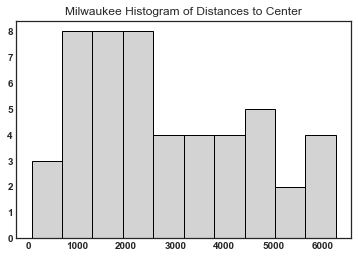

In [1195]:
x = dataframe_filtered['distance']
plt.hist(x, bins = 10, color=['lightgray'], edgecolor = 'black')
plt.title("Milwaukee Histogram of Distances to Center")
plt.show()

## Calculate summary statistics and meaures of central tendency

In [1196]:
from scipy.stats import median_absolute_deviation
from scipy import stats 
mn = (x.mean())
med = (x.median())
St_Dev = np.around(x.std())
MAD = np.around(median_absolute_deviation(x))
IQR = np.around(stats.iqr(x, interpolation = 'midpoint'))
print('Mean =', mn)
print('Median = ', med)
print('Standard Deviation =', St_Dev)
print('Median Absolute Deviation =', MAD)
print('Inter-Quartile Range =', IQR)

Mean = 2804.64
Median =  2195.5
Standard Deviation = 1710.0
Median Absolute Deviation = 1862.0
Inter-Quartile Range = 2588.0


## Plot different measures

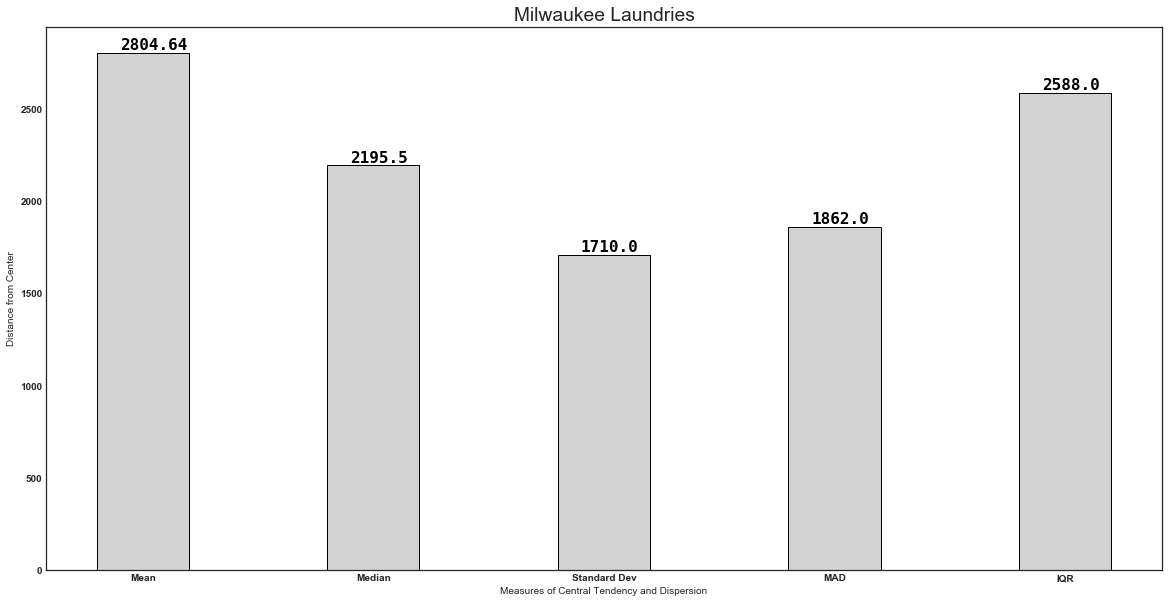

In [1197]:
measures = ('Mean', "Median", "Standard Dev", "MAD", "IQR")
values = (mn, med, St_Dev, MAD, IQR)

plt.figure(figsize=(20,10)) 
bars = plt.bar(measures, height=values, width=.4, color=['lightgray'], edgecolor = 'black')

font = {'family' : 'monospace',
        'size'   : 16}
matplotlib.rcParams['text.color'] = 'black'

matplotlib.rc('font', **font)


xlocs, xlabs = plt.xticks()

# reference x so you don't need to change the range each time x changes
xlocs=[i for i in measures]
xlabs=[i for i in measures]

plt.xlabel('Measures of Central Tendency and Dispersion')
plt.ylabel('Distance from Center')
plt.title("Milwaukee Laundries")
plt.xticks(xlocs, xlabs)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.1, yval + .01, yval, ha='left', va='bottom')
    
plt.show()

## Plot each laundry and distance from center

In [1198]:
m = folium.Map([laundry_center_lat, laundry_center_lng], zoom_start=13)

for lat, lng in zip(laundry_ll.lat, laundry_ll.lng):
    p1 = [laundry_center_lat, laundry_center_lng]
    p2 = [lat, lng]
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        popup=label,
        fill = True,
        fill_color='gray',
        fill_opacity=0.5
        ).add_to(m)

for lat, lng in zip(laundry_ll.lat, laundry_ll.lng):
    p1 = [laundry_center_lat, laundry_center_lng]
    p2 = [lat, lng]
    folium.PolyLine(locations=[p1, p2], color='darkgray').add_to(m)

folium.features.CircleMarker([laundry_center_lat, laundry_center_lng], color = 'black', radius = 12, fill_opacity = .2).add_to(m)


    
# display map
m

***
***
***

# <span style="color:orange"> Minnesota </span>  

# <span style="color:orange"> Minneapolis/Saint Paul Laundries</span>  

In [1200]:
df_twin = df_mn[df_mn['City'].str.contains('Minneapolis|Saint Paul')]

df_twin.reset_index(drop= True, inplace = True)
df_twin.head(10).sort_values(by=['City'], ascending=False)

Zip         City   Latitude  Longitude
4  55119   Saint Paul  44.957315 -93.006160
5  55169   Saint Paul  45.005902 -93.105869
6  55115   Saint Paul  45.060048 -92.957620
0  55422  Minneapolis  45.014764 -93.339650
1  55436  Minneapolis  44.903864 -93.370560
2  55441  Minneapolis  45.001997 -93.424210
3  55432  Minneapolis  45.095674 -93.253360
7  55454  Minneapolis  44.969465 -93.243270
8  55478  Minneapolis  45.015914 -93.471880
9  55420  Minneapolis  44.837964 -93.276570

In [1201]:
CLIENT_ID = 'DTCSBRDEARI5YPHBKTHXXHA2SKQKS0FEOQK0J2L13MQ3T2VE' # your Foursquare ID
CLIENT_SECRET = 'KK20BPB5FXZTBKFIWE0MXLJUS4A3QDZDKK1TY13PHOKDH5DI' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DTCSBRDEARI5YPHBKTHXXHA2SKQKS0FEOQK0J2L13MQ3T2VE
CLIENT_SECRET:KK20BPB5FXZTBKFIWE0MXLJUS4A3QDZDKK1TY13PHOKDH5DI


### Set up query

In [1202]:
search_query = 'Laundry'
radius = 5000

#latitude = 44.97, 
#longitude = -93.26
latitude = 44.9778
longitude =  -93.2651

In [1203]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=DTCSBRDEARI5YPHBKTHXXHA2SKQKS0FEOQK0J2L13MQ3T2VE&client_secret=KK20BPB5FXZTBKFIWE0MXLJUS4A3QDZDKK1TY13PHOKDH5DI&ll=44.9778,-93.2651&v=20180604&query=Laundry&radius=5000&limit=100'

In [1204]:
results2 = requests.get(url).json()
results2

{'meta': {'code': 200, 'requestId': '5ee803efb336d03c8b68fabe'},
 'response': {'venues': [{'id': '4a7b9290f964a52073eb1fe3',
    'name': 'Giant Wash Coin Laundry',
    'location': {'address': '2325 Lyndale Ave S',
     'crossStreet': '24th',
     'lat': 44.959356784285426,
     'lng': -93.28750405271943,
     'labeledLatLngs': [{'label': 'display',
       'lat': 44.959356784285426,
       'lng': -93.28750405271943},
      {'label': 'entrance', 'lat': 44.959358, 'lng': -93.287528}],
     'distance': 2707,
     'postalCode': '55405',
     'cc': 'US',
     'city': 'Minneapolis',
     'state': 'MN',
     'country': 'United States',
     'formattedAddress': ['2325 Lyndale Ave S (24th)',
      'Minneapolis, MN 55405',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1fc941735',
      'name': 'Laundry Service',
      'pluralName': 'Laundry Services',
      'shortName': 'Laundry',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/laundry_',
       'suffix

In [1205]:
# assign relevant part of JSON to venues
venues = results2['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


id                      name  \
0  4a7b9290f964a52073eb1fe3   Giant Wash Coin Laundry   
1  4fe0a1f2e4b0b6c4dac5a091      river towers laundry   
2  4f63815de4b02ac2c425b598          The Laundry Room   
3  57f57c61cd10e038d0d88950  Miller Hall Laundry Room   
4  4cb728a555af224b7d1b9f7e   Giant Wash Coin Laundry   

                                          categories    referralId  hasPerk  \
0  [{'id': '4bf58dd8d48988d1fc941735', 'name': 'L...  v-1592264124    False   
1  [{'id': '4d954b06a243a5684965b473', 'name': 'R...  v-1592264124    False   
2  [{'id': '4d954b06a243a5684965b473', 'name': 'R...  v-1592264124    False   
3  [{'id': '4bf58dd8d48988d1fc941735', 'name': 'L...  v-1592264124    False   
4  [{'id': '4bf58dd8d48988d1fc941735', 'name': 'L...  v-1592264124    False   

     location.address        location.crossStreet  location.lat  location.lng  \
0  2325 Lyndale Ave S                        24th     44.959357    -93.287504   
1                 NaN                         NaN     44.983273    -93.265789   
2                 NaN                         NaN     44.965399    -93.272659   
3      910 Elliot Ave                         NaN     44.969349    -93.261490   
4                 NaN  Larpenteur and Rice Street     44.967003    -93.257596   

                             location.labeledLatLngs  location.distance  \
0  [{'label': 'display', 'lat': 44.95935678428542...               2707   
1  [{'label': 'display', 'lat': 44.98327275843254...                611   
2  [{'label': 'display', 'lat': 44.96539917423145...               1503   
3  [{'label': 'display', 'lat': 44.9693489074707,...                982   
4  [{'label': 'display', 'lat': 44.96700346469879...               1339   

  location.postalCode location.cc location.city location.state  \
0               55405          US   Minneapolis             MN   
1               55401          US   Minneapolis             MN   
2                 NaN          US           NaN      Minnesota   
3               55404          US   Minneapolis             MN   
4               55404          US    Saint Paul             MN   

  location.country                          location.formattedAddress  \
0    United States  [2325 Lyndale Ave S (24th), Minneapolis, MN 55...   
1    United States             [Minneapolis, MN 55401, United States]   
2    United States                         [Minnesota, United States]   
3    United States  [910 Elliot Ave, Minneapolis, MN 55404, United...   
4    United States              [Saint Paul, MN 55404, United States]   

  venuePage.id  
0     40344153  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [1206]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

name  \
0                         Giant Wash Coin Laundry   
1                            river towers laundry   
2                                The Laundry Room   
3                        Miller Hall Laundry Room   
4                         Giant Wash Coin Laundry   
5                            Waldorf Laundry Room   
6                    Cityview Condos laundry room   
7                             The Laundry Dungeon   
8                                    Laundry Room   
9                         Offputting Laundry Room   
10                                   Laundry Room   
11                               OTG Laundry Room   
12                     Higher Ground Laundry Room   
13                  Oak Grove Towers Laundry Room   
14                           Franklin Laundry Mat   
15                              giant laundry max   
16                                    Laundry Mat   
17                      Park Terrace Laundry Room   
18                       Middlebrook Laundry Room   
19                       Laundry Room (CSCC) 1052   
20                               Laundry Location   
21                             Laundry Facilities   
22                               901 Laundry Room   
23                                   Laundry City   
24                      Chicago Lake Coin Laundry   
25                            Lake Street Laundry   
26                        Ultra Wash Coin Laundry   
27                         Northstar Laundry Room   
28                   In The Basment Doing Laundry   
29                          The F IN Laundry Room   
30                                     Do Laundry   
31                              Joe's Laundry Mat   
32                                Rainbow Laundry   
33                                   Coin Laundry   
34                           Rainbow Laundry Mpls   
35              Giant Wash Coin Laundry - Lake St   
36                                Mei Hua Laundry   
37                                    Lake Street   
38                               basement laundry   
39                            Maytag Coin Laundry   
40                              City Coin Laundry   
41     Don's  Leather Cleaning & Area Rug Laundry   
42                           American Rug Laundry   
43  Brandonna's Transgendered Basement Laundrymat   
44                               Kysa's LoveTress   

                                  categories                     address  \
0                            Laundry Service          2325 Lyndale Ave S   
1   Residential Building (Apartment / Condo)                         NaN   
2   Residential Building (Apartment / Condo)                         NaN   
3                            Laundry Service              910 Elliot Ave   
4                            Laundry Service                         NaN   
5                            Laundry Service               639 E 18th St   
6   Residential Building (Apartment / Condo)                         NaN   
7                                 Laundromat          2545 Blaisdell Ave   
8                            Laundry Service             Centennial Hall   
9                            Laundry Service                         NaN   
10                    College Residence Hall                         NaN   
11                           Laundry Service                         NaN   
12                                  Building                         NaN   
13                           Laundry Service            215 Oak Grove St   
14                           Laundry Service          903 E Franklin Ave   
15                           Laundry Service            1922 Clinton Ave   
16                                  Building                         NaN   
17  Residential Building (Apartment / Condo)                         NaN   
18                           Laundry Service              412 22nd Sve S   
19                           Laundry Service                         NaN   
20        

In [1207]:
laundry_ll2 = dataframe_filtered[['lat', 'lng', 'name']]
laundry_ll2['name'] = laundry_ll2['name'].str.replace("'", "")
laundry_ll2.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


lat        lng                      name
0  44.959357 -93.287504   Giant Wash Coin Laundry
1  44.983273 -93.265789      river towers laundry
2  44.965399 -93.272659          The Laundry Room
3  44.969349 -93.261490  Miller Hall Laundry Room
4  44.967003 -93.257596   Giant Wash Coin Laundry

In [1208]:
laundry_map2 = folium.Map(location=[44.9778, -93.2650], zoom_start=12)


for lat, lng, labels in zip(laundry_ll2.lat, laundry_ll2.lng, laundry_ll2.name):    
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup= labels,
        fill = True,
        fill_color='blue',
        fill_opacity=0.5
    ).add_to(laundry_map2)

# display map
laundry_map2

## Calculate the geographic center of all the laundries in Milwaukee with Haversine formula

In [1209]:
laundry_ll2.lat.head()

0    44.959357
1    44.983273
2    44.965399
3    44.969349
4    44.967003
Name: lat, dtype: float64

In [1210]:
import math

x = 0.0
y = 0.0
z = 0.0

for i, coord in laundry_ll2.iterrows():
    latitude = math.radians(coord.lat)
    longitude = math.radians(coord.lng)

    x += math.cos(latitude) * math.cos(longitude)
    y += math.cos(latitude) * math.sin(longitude)
    z += math.sin(latitude)

total = len(laundry_ll2)

x = x / total
y = y / total
z = z / total

central_longitude2 = math.atan2(y, x)
central_square_root = math.sqrt(x * x + y * y)
central_latitude2 = math.atan2(z, central_square_root)

mean_location2 = {
    'latitude': math.degrees(central_latitude2),
    'longitude': math.degrees(central_longitude2)
    }

print(mean_location2)
laundry_center_lat2 = math.degrees(central_latitude2)
laundry_center_lng2 = math.degrees(central_longitude2)
print(laundry_center_lat2)
print(laundry_center_lng2)

{'latitude': 44.96157909180008, 'longitude': -93.25991732416401}
44.96157909180008
-93.25991732416401


## Calculate the distance from each laundry in Minnesota from the geographic center

In [1211]:

from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

laundry_ll2.distance = 0
    
for i, row in dataframe_filtered.iterrows():
    lat1 = radians(dataframe_filtered.lat[i])
    lon1 = radians(dataframe_filtered.lng[i])
    lat2 = radians(math.degrees(central_latitude2))
    lon2 = radians(math.degrees(central_longitude2))
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    dataframe_filtered.distance[i] = (R * c)*1000

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [1212]:
dataframe_filtered.head(10)

name                                categories  \
0       Giant Wash Coin Laundry                           Laundry Service   
1          river towers laundry  Residential Building (Apartment / Condo)   
2              The Laundry Room  Residential Building (Apartment / Condo)   
3      Miller Hall Laundry Room                           Laundry Service   
4       Giant Wash Coin Laundry                           Laundry Service   
5          Waldorf Laundry Room                           Laundry Service   
6  Cityview Condos laundry room  Residential Building (Apartment / Condo)   
7           The Laundry Dungeon                                Laundromat   
8                  Laundry Room                           Laundry Service   
9       Offputting Laundry Room                           Laundry Service   

              address                 crossStreet        lat        lng  \
0  2325 Lyndale Ave S                        24th  44.959357 -93.287504   
1                 NaN                         NaN  44.983273 -93.265789   
2                 NaN                         NaN  44.965399 -93.272659   
3      910 Elliot Ave                         NaN  44.969349 -93.261490   
4                 NaN  Larpenteur and Rice Street  44.967003 -93.257596   
5       639 E 18th St                         NaN  44.965041 -93.265678   
6                 NaN                         NaN  44.964415 -93.276930   
7  2545 Blaisdell Ave                     26th St  44.955765 -93.279259   
8     Centennial Hall                         NaN  44.972451 -93.229487   
9                 NaN                         NaN  44.967311 -93.278711   

                                      labeledLatLngs  distance postalCode  cc  \
0  [{'label': 'display', 'lat': 44.95935678428542...      2185      55405  US   
1  [{'label': 'display', 'lat': 44.98327275843254...      2456      55401  US   
2  [{'label': 'display', 'lat': 44.96539917423145...      1089        NaN  US   
3  [{'label': 'display', 'lat': 44.9693489074707,...       873      55404  US   
4  [{'label': 'display', 'lat': 44.96700346469879...       630      55404  US   
5  [{'label': 'display', 'lat': 44.965041, 'lng':...       594      55404  US   
6  [{'label': 'display', 'lat': 44.964415, 'lng':...      1375        NaN  US   
7  [{'label': 'display', 'lat': 44.95576477050781...      1654      55404  US   
8  [{'label': 'display', 'lat': 44.9724510979314,...      2682      55414  US   
9  [{'label': 'display', 'lat': 44.967311, 'lng':...      1610      55403  US   

          city      state        country  \
0  Minneapolis         MN  United States   
1  Minneapolis         MN  United States   
2          NaN  Minnesota  United States   
3  Minneapolis         MN  United States   
4   Saint Paul         MN  United States   
5  Minneapolis         MN  United States   
6  Minneapolis         MN  United States   
7  Minneapolis         MN  United States   
8  Minneapolis         MN  United States   
9  Minneapolis         MN  United States   

                                    formattedAddress                        id  
0  [2325 Lyndale Ave S (24th), Minneapolis, MN 55...  4a7b9290f964a52073eb1fe3  
1             [Minneapolis, MN 55401, United States]  4fe0a1f2e4b0b6c4dac5a091  
2                         [Minnesota, United States]  4f63815de4b02ac2c425b598  
3  [910 Elliot Ave, Minneapolis, MN 55404, United...  57f57c61cd10e038d0d88950  
4              [Saint Paul, MN 55404, United States]  4cb728a555af224b7d1b9f7e  
5  [639 E 18th St, Minneapolis, MN 55404, United ...  4e7fc8dce5fa584ebb582805  
6                   [Minneapolis, MN, United States]  5671eab5498eebb1611460a9  
7  [2545 Blaisdell Ave (26th St), Minneapolis, MN...  5c7542edfebf31002be3abcf  
8  [Centennial Hall, Minneapolis, MN 55414, Unite...  504f48fde4b05191694539ce  
9             [Minneapolis, MN 55403, United States]  4f84f114e4b0be4a11849d26

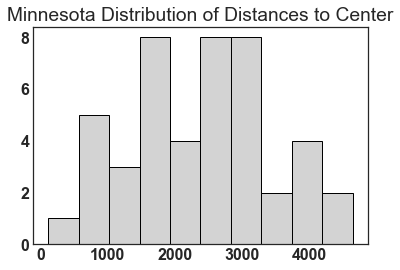

In [1213]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = dataframe_filtered['distance']
plt.hist(x, bins = 10, color=['lightgray'], edgecolor = 'black')
plt.title("Minnesota Distribution of Distances to Center")
plt.show()

In [1214]:
from scipy.stats import median_absolute_deviation
from scipy import stats 
mn = np.around(x.mean())
med = (x.median())
St_Dev = np.around(x.std())
MAD = np.around(median_absolute_deviation(x))
IQR = np.around(stats.iqr(x, interpolation = 'midpoint'))
print('Mean =', mn)
print('Median = ', med)
print('Standard Deviation =', St_Dev)
print('Median Absolute Deviation =', MAD)
print('Inter-Quartile Range =', IQR)

Mean = 2364.0
Median =  2418.0
Standard Deviation = 1090.0
Median Absolute Deviation = 1041.0
Inter-Quartile Range = 1454.0


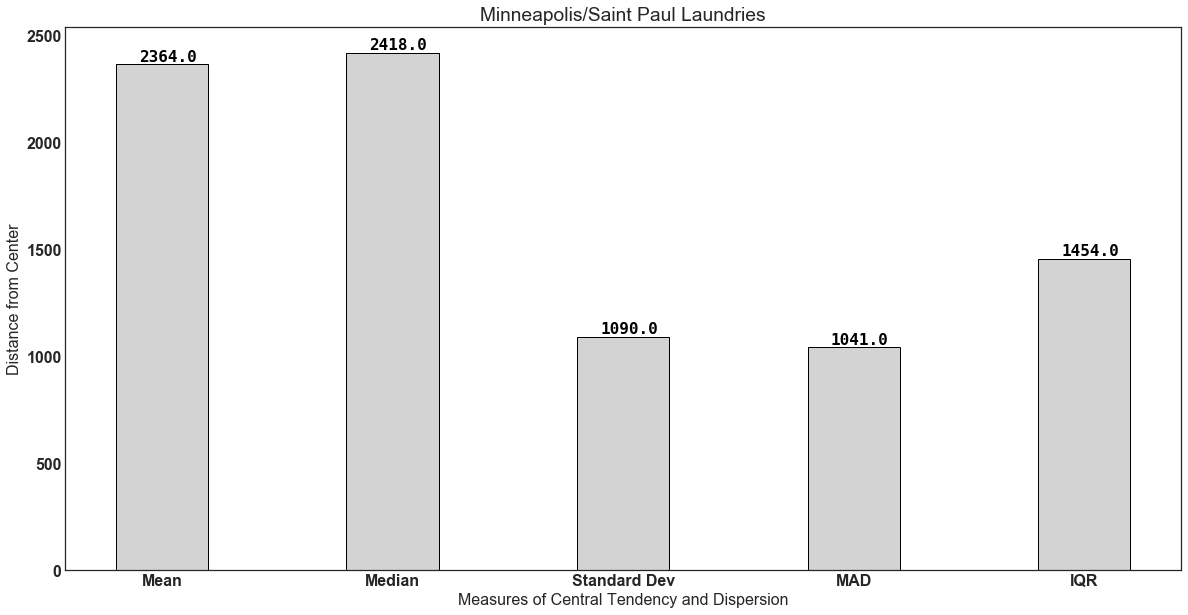

In [1215]:
measures = ('Mean', "Median", "Standard Dev", "MAD", "IQR")
values = (mn, med, St_Dev, MAD, IQR)

plt.figure(figsize=(20,10)) 
bars = plt.bar(measures, height=values, width=.4, color=['lightgray'], edgecolor = 'black')

matplotlib.rcParams['text.color'] = 'black'

matplotlib.rc('font', **font)


xlocs, xlabs = plt.xticks()

# reference x so you don't need to change the range each time x changes
xlocs=[i for i in measures]
xlabs=[i for i in measures]

plt.xlabel('Measures of Central Tendency and Dispersion')
plt.ylabel('Distance from Center')
plt.title("Minneapolis/Saint Paul Laundries")
plt.xticks(xlocs, xlabs)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.1, yval + .005, yval, ha='left', va='bottom')

plt.show()

In [1216]:
m2 = folium.Map([laundry_center_lat2, laundry_center_lng2], zoom_start=14)

for lat, lng in zip(laundry_ll2.lat, laundry_ll2.lng):
    p1 = [laundry_center_lat2, laundry_center_lng2]
    p2 = [lat, lng]
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='gold',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.5
        ).add_to(m2)

for lat, lng in zip(laundry_ll2.lat, laundry_ll2.lng):
    p1 = [laundry_center_lat2, laundry_center_lng2]
    p2 = [lat, lng]
    folium.PolyLine(locations=[p1, p2], color='darkgray').add_to(m2)

folium.features.CircleMarker([laundry_center_lat2, laundry_center_lng2], color = 'royalblue', radius = 12, fill_opacity = .2).add_to(m2)


    
# display map
m2

***
***
***

# <span style="color:orange"> Milwaukee Banks </span>  

In [1217]:
CLIENT_ID = 'DTCSBRDEARI5YPHBKTHXXHA2SKQKS0FEOQK0J2L13MQ3T2VE' # your Foursquare ID
CLIENT_SECRET = 'KK20BPB5FXZTBKFIWE0MXLJUS4A3QDZDKK1TY13PHOKDH5DI' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DTCSBRDEARI5YPHBKTHXXHA2SKQKS0FEOQK0J2L13MQ3T2VE
CLIENT_SECRET:KK20BPB5FXZTBKFIWE0MXLJUS4A3QDZDKK1TY13PHOKDH5DI


In [1218]:
search_query = 'financial'
radius = 5000
latitude = 43.0389
longitude =  -87.9065

In [1219]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=DTCSBRDEARI5YPHBKTHXXHA2SKQKS0FEOQK0J2L13MQ3T2VE&client_secret=KK20BPB5FXZTBKFIWE0MXLJUS4A3QDZDKK1TY13PHOKDH5DI&ll=43.0389,-87.9065&v=20180604&query=financial&radius=5000&limit=100'

In [1220]:
results3 = requests.get(url).json()
results3

{'meta': {'code': 200, 'requestId': '5ee805115159bf15c3b84b3a'},
 'response': {'venues': [{'id': '4d83ad1ef1e56ea8e397658a',
    'name': 'Northwestern Mutual - Lueder Financial Group',
    'location': {'address': '731 N Jackson St',
     'lat': 43.03947050647817,
     'lng': -87.90413482418865,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.03947050647817,
       'lng': -87.90413482418865}],
     'distance': 202,
     'postalCode': '53202',
     'cc': 'US',
     'city': 'Milwaukee',
     'state': 'WI',
     'country': 'United States',
     'formattedAddress': ['731 N Jackson St',
      'Milwaukee, WI 53202',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d130941735',
      'name': 'Building',
      'pluralName': 'Buildings',
      'shortName': 'Building',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/default_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1592264126',
    'hasPerk': False},
   {'id

In [1221]:
# assign relevant part of JSON to venues
banks1 = results3['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(banks1)
dataframe.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


id                                           name  \
0  4d83ad1ef1e56ea8e397658a   Northwestern Mutual - Lueder Financial Group   
1  5d0b1c48fcc4ec00238289f7  Financial Advisors | U.S. Bancorp Investments   
2  4c058315761ac9b650a01f74                         UBS Financial Services   
3  4bb3b05614cfd13a266816ab                        Catholic Financial Life   
4  4d7e8dc9b25d6dcbe5f7bb42                   Top Rated Financial Services   

                                          categories    referralId  hasPerk  \
0  [{'id': '4bf58dd8d48988d130941735', 'name': 'B...  v-1592264126    False   
1  [{'id': '503287a291d4c4b30a586d65', 'name': 'F...  v-1592264126    False   
2  [{'id': '4bf58dd8d48988d124941735', 'name': 'O...  v-1592264126    False   
3  [{'id': '503287a291d4c4b30a586d65', 'name': 'F...  v-1592264126    False   
4  [{'id': '4bf58dd8d48988d124941735', 'name': 'O...  v-1592264126    False   

      location.address  location.lat  location.lng  \
0     731 N Jackson St     43.039471    -87.904135   
1  777 E Wisconsin Ave     43.038250    -87.902080   
2  411E Wisconsin Ave.     43.037880    -87.905884   
3      1100 W Wells St     43.040373    -87.926291   
4  700 N Art Museum Dr     43.039124    -87.909266   

                             location.labeledLatLngs  location.distance  \
0  [{'label': 'display', 'lat': 43.03947050647817...                202   
1  [{'label': 'display', 'lat': 43.03825, 'lng': ...                366   
2  [{'label': 'display', 'lat': 43.03788, 'lng': ...                124   
3  [{'label': 'display', 'lat': 43.040373, 'lng':...               1618   
4  [{'label': 'display', 'lat': 43.03912410597543...                226   

  location.postalCode location.cc location.city location.state  \
0               53202          US     Milwaukee             WI   
1               53202          US     Milwaukee             WI   
2               53202          US     Milwaukee             WI   
3               53233          US     Milwaukee             WI   
4               53202          US     Milwaukee             WI   

  location.country                          location.formattedAddress  \
0    United States  [731 N Jackson St, Milwaukee, WI 53202, United...   
1    United States  [777 E Wisconsin Ave, Milwaukee, WI 53202, Uni...   
2    United States  [411E Wisconsin Ave., Milwaukee, WI 53202, Uni...   
3    United States  [1100 W Wells St, Milwaukee, WI 53233, United ...   
4    United States  [700 N Art Museum Dr (Wisconsin), Milwaukee, W...   

  venuePage.id location.crossStreet  
0          NaN                  NaN  
1    585518214                  NaN  
2          NaN                  NaN  
3    126047573                  NaN  
4          NaN            Wisconsin

In [1222]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

name  \
0        Northwestern Mutual - Lueder Financial Group   
1       Financial Advisors | U.S. Bancorp Investments   
2                              UBS Financial Services   
3                             Catholic Financial Life   
4                        Top Rated Financial Services   
5                             Johnson Financial Group   
6                              Holter Financial Group   
7                                great west financial   
8                        Corporate Financial Advisors   
9                                Bull Moose Financial   
10                                     Bank Five Nine   
11  Joseph J Weirich - RBC Wealth Management Finan...   
12  Penny Kailing - RBC Wealth Management Financia...   
13  Jeffrey A. Jaeger - RBC Wealth Management Fina...   
14  Rachel Panasuk - RBC Wealth Management Financi...   
15  Raymond C. Krieg - RBC Wealth Management Finan...   
16  James M. Wozniak - RBC Wealth Management Finan...   
17  Sorin Iancu - RBC Wealth Management Financial ...   
18  David F. Radtke - RBC Wealth Management Financ...   
19  Jonas Edstrom - RBC Wealth Management Financia...   
20                            Tech Financial Services   
21                                BMO Financial Group   
22                            Tech Financial Services   
23                       Prime Financial Credit Union   
24                             Community Financial #5   
25                          MSOE Financial Aid Office   
26      Financial Advisors | U.S. Bancorp Investments   
27                          MATC Financial Aid Office   
28                       Mellencamp 162 Financial Aid   
29                                Community Financial   
30                                  OneMain Financial   
31  Jonathan Schultz  - CMG Financial Mortgage Loa...   
32                 Community Financial Service Center   
33  Merrill Lynch Wealth Management Advisor Wendy ...   
34  Merrill Lynch Wealth Management Advisor Andrew...   
35  Merrill Lynch Wealth Management Advisor Jeremy...   
36                 Community Financial Service Center   
37               Farmers Financial - The Adams Agency   
38                 Community Financial Service Center   
39                                Community Financial   
40  Edward Jones - Financial Advisor: Nivek E Redmond   
41  Edward Jones - Financial Advisor: Phillip B Berge   
42   Edward Jones - Financial Advisor: Greg Baumgardt   
43                                Community Financial   
44            Riverworks Financial Opportunity Center   
45                                Community Financial   
46                            Catholic Financial Life   
47                            Johnson Financial Group   
48                 Community Financial Service Center   
49                                Community Financial   

                         categories                             address  \
0                          Building                    731 N Jackson St   
1        Financial or Legal Service                 777 E Wisconsin Ave   
2                            Office                 411E Wisconsin Ave.   
3        Financial or Legal Service                     1100 W Wells St   
4                            Office                 700 N Art Museum Dr   
5        Financial or Legal Service           100 E Wisconsin Ave #2400   
6                            Office        100 E Wisconsin Ave Ste 2300   
7                   Business Center                                 NaN   
8                            Office         111 E Kilbourn Ave Ste 2800   
9                   Business Center              342 N Water St Ste 820   
10                             Bank                 400 E Wisconsin Ave   
11       Financial or Legal Service       1000 N. Water St., Suite 1500   
12       Financial or Legal Service            1000 N Water St Ste 1500   
13       Financial or Legal Service            1000 N Water St Ste 1500   
14       Financi

In [1223]:
banks = dataframe_filtered[['lat', 'lng', 'name']]
banks['name'] = banks['name'].str.replace("'", "")

banks.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


lat        lng                                           name
0  43.039471 -87.904135   Northwestern Mutual - Lueder Financial Group
1  43.038250 -87.902080  Financial Advisors | U.S. Bancorp Investments
2  43.037880 -87.905884                         UBS Financial Services
3  43.040373 -87.926291                        Catholic Financial Life
4  43.039124 -87.909266                   Top Rated Financial Services

In [1224]:
banks_map = folium.Map(location=[43.0389, -87.9065], zoom_start=12)

for lat, lng, labels in zip(banks.lat, banks.lng, banks.name):    
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup= labels,
        fill = True,
        fill_color='blue',
        fill_opacity=0.5
    ).add_to(banks_map)


# display map
banks_map

## Calculate geographic center of Milwaukee banks

In [1225]:
import math

x = 0.0
y = 0.0
z = 0.0

for i, coord in banks.iterrows():
    latitude = math.radians(coord.lat)
    longitude = math.radians(coord.lng)

    x += math.cos(latitude) * math.cos(longitude)
    y += math.cos(latitude) * math.sin(longitude)
    z += math.sin(latitude)

total = len(banks)

x = x / total
y = y / total
z = z / total

central_longitude_b = math.atan2(y, x)
central_square_root = math.sqrt(x * x + y * y)
central_latitude_b = math.atan2(z, central_square_root)

mean_location_b = {
    'latitude': math.degrees(central_latitude_b),
    'longitude': math.degrees(central_longitude_b)
    }

print(mean_location_b)
bank_center_lat = math.degrees(central_latitude_b)
bank_center_lng = math.degrees(central_longitude_b)
print(bank_center_lat)
print(bank_center_lng)

{'latitude': 43.03994216155426, 'longitude': -87.91410257928118}
43.03994216155426
-87.91410257928118


## Calculate distance of each bank from the center

In [1226]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

dataframe_filtered.distance = 0

for i, row in dataframe_filtered.iterrows():
    lat1 = radians(dataframe_filtered.lat[i])
    lon1 = radians(dataframe_filtered.lng[i])
    lat2 = radians(math.degrees(central_latitude_b))
    lon2 = radians(math.degrees(central_longitude_b))
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    dataframe_filtered.distance[i] = (R * c)*1000


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [1227]:
dataframe_filtered.head(10)

name                  categories  \
0   Northwestern Mutual - Lueder Financial Group                    Building   
1  Financial Advisors | U.S. Bancorp Investments  Financial or Legal Service   
2                         UBS Financial Services                      Office   
3                        Catholic Financial Life  Financial or Legal Service   
4                   Top Rated Financial Services                      Office   
5                        Johnson Financial Group  Financial or Legal Service   
6                         Holter Financial Group                      Office   
7                           great west financial             Business Center   
8                   Corporate Financial Advisors                      Office   
9                           Bull Moose Financial             Business Center   

                        address        lat        lng  \
0              731 N Jackson St  43.039471 -87.904135   
1           777 E Wisconsin Ave  43.038250 -87.902080   
2           411E Wisconsin Ave.  43.037880 -87.905884   
3               1100 W Wells St  43.040373 -87.926291   
4           700 N Art Museum Dr  43.039124 -87.909266   
5     100 E Wisconsin Ave #2400  43.038941 -87.909585   
6  100 E Wisconsin Ave Ste 2300  43.039747 -87.909252   
7                           NaN  43.038008 -87.910684   
8   111 E Kilbourn Ave Ste 2800  43.041445 -87.911146   
9        342 N Water St Ste 820  43.034728 -87.908280   

                                      labeledLatLngs  distance postalCode  cc  \
0  [{'label': 'display', 'lat': 43.03947050647817...       812      53202  US   
1  [{'label': 'display', 'lat': 43.03825, 'lng': ...       995      53202  US   
2  [{'label': 'display', 'lat': 43.03788, 'lng': ...       706      53202  US   
3  [{'label': 'display', 'lat': 43.040373, 'lng':...       992      53233  US   
4  [{'label': 'display', 'lat': 43.03912410597543...       403      53202  US   
5  [{'label': 'display', 'lat': 43.03894056924398...       383      53202  US   
6  [{'label': 'display', 'lat': 43.03974653058411...       394      53202  US   
7  [{'label': 'display', 'lat': 43.03800801731525...       351        NaN  US   
8  [{'label': 'display', 'lat': 43.041445, 'lng':...       292      53202  US   
9  [{'label': 'display', 'lat': 43.034728, 'lng':...       748      53202  US   

        city state        country  \
0  Milwaukee    WI  United States   
1  Milwaukee    WI  United States   
2  Milwaukee    WI  United States   
3  Milwaukee    WI  United States   
4  Milwaukee    WI  United States   
5  Milwaukee    WI  United States   
6  Milwaukee    WI  United States   
7  Milwaukee    WI  United States   
8  Milwaukee    WI  United States   
9  Milwaukee    WI  United States   

                                    formattedAddress crossStreet  \
0  [731 N Jackson St, Milwaukee, WI 53202, United...         NaN   
1  [777 E Wisconsin Ave, Milwaukee, WI 53202, Uni...         NaN   
2  [411E Wisconsin Ave., Milwaukee, WI 53202, Uni...         NaN   
3  [1100 W Wells St, Milwaukee, WI 53233, United ...         NaN   
4  [700 N Art Museum Dr (Wisconsin), Milwaukee, W...   Wisconsin   
5  [100 E Wisconsin Ave #2400, Milwaukee, WI 5320...         NaN   
6  [100 E Wisconsin Ave Ste 2300, Milwaukee, WI 5...         NaN   
7                     [Milwaukee, WI, United States]         NaN   
8  [111 E Kilbourn Ave Ste 2800, Milwaukee, WI 53...         NaN   
9  [342 N Water St Ste 820, Milwaukee, WI 53202, ...         NaN   

                         id  
0  4d83ad1ef1e56ea8e397658a  
1  5d0b1c48fcc4ec00238289f7  
2  4c058315761ac9b650a01f74  
3  4bb3b05614cfd13a266816ab  
4  4d7e8dc9b25d6dcbe5f7bb42  
5  599eff26a4236278d32091b0  
6  4cd4741c7da9a35da0b3e3b9  
7  56e8006f498e1a2d7c720e86  
8  4c2a5c9cd1a10f476351f664  
9  5849e144abf632125e46aa46

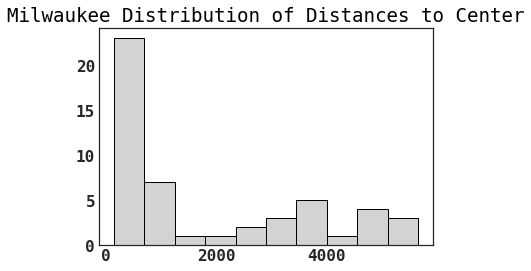

In [1228]:
x = dataframe_filtered['distance']
plt.hist(x, bins = 10, color=['lightgray'], edgecolor = 'black')
plt.title("Milwaukee Distribution of Distances to Center")
plt.show()

In [1229]:
from scipy.stats import median_absolute_deviation
from scipy import stats 
mn = (x.mean())
med = (x.median())
St_Dev = np.around(x.std())
MAD = np.around(median_absolute_deviation(x))
IQR = np.around(stats.iqr(x, interpolation = 'midpoint'))
print('Mean =', mn)
print('Median = ', med)
print('Standard Deviation =', St_Dev)
print('Median Absolute Deviation =', MAD)
print('Inter-Quartile Range =', IQR)

Mean = 1886.68
Median =  780.0
Standard Deviation = 1812.0
Median Absolute Deviation = 695.0
Inter-Quartile Range = 2860.0


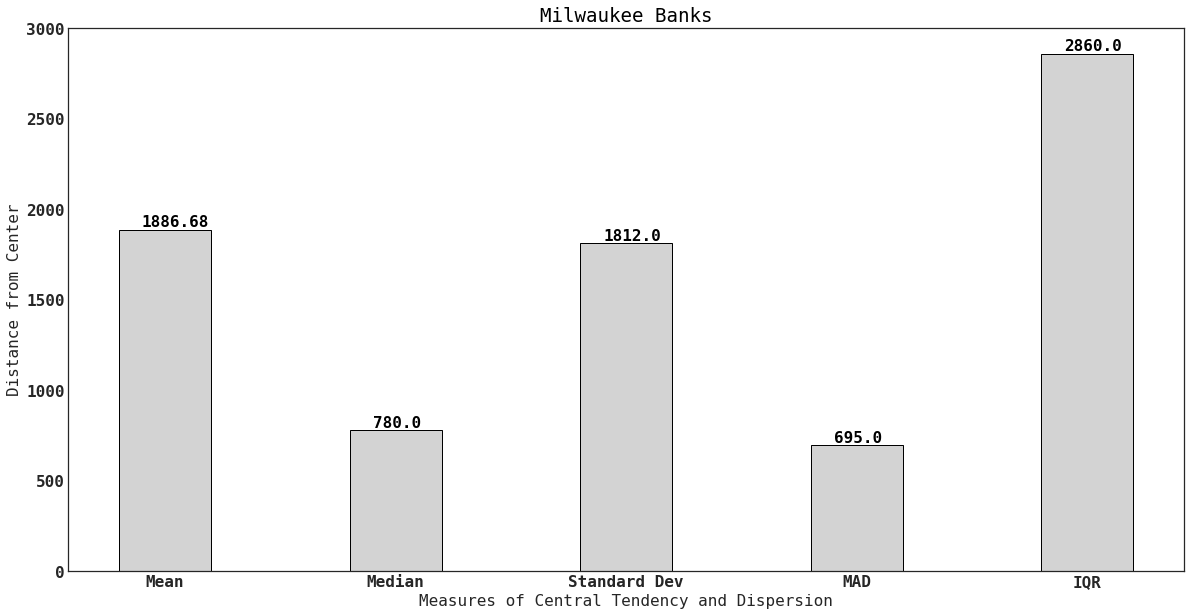

In [1230]:
measures = ('Mean', "Median", "Standard Dev", "MAD", "IQR")
values = (mn, med, St_Dev, MAD, IQR)

plt.figure(figsize=(20,10)) 
bars = plt.bar(measures, height=values, width=.4, color=['lightgray'], edgecolor = 'black')

font = {'family' : 'monospace',
        'size'   : 16}
matplotlib.rcParams['text.color'] = 'black'

matplotlib.rc('font', **font)


xlocs, xlabs = plt.xticks()

# reference x so you don't need to change the range each time x changes
xlocs=[i for i in measures]
xlabs=[i for i in measures]

plt.xlabel('Measures of Central Tendency and Dispersion')
plt.ylabel('Distance from Center')
plt.title("Milwaukee Banks")
plt.xticks(xlocs, xlabs)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.1, yval + .01, yval, ha='left', va='bottom')
    

# <span style="color:orange"> Minneapolist/Saint Paul Banks </span>  

In [1231]:
CLIENT_ID = 'DTCSBRDEARI5YPHBKTHXXHA2SKQKS0FEOQK0J2L13MQ3T2VE' # your Foursquare ID
CLIENT_SECRET = 'KK20BPB5FXZTBKFIWE0MXLJUS4A3QDZDKK1TY13PHOKDH5DI' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DTCSBRDEARI5YPHBKTHXXHA2SKQKS0FEOQK0J2L13MQ3T2VE
CLIENT_SECRET:KK20BPB5FXZTBKFIWE0MXLJUS4A3QDZDKK1TY13PHOKDH5DI


In [1232]:
search_query = 'financial'
radius = 5000
latitude = 44.9778
longitude =  -93.2651

In [1233]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

results4 = requests.get(url).json()
results4

{'meta': {'code': 200, 'requestId': '5ee80666057b150fc0bfe594'},
 'response': {'venues': [{'id': '4c5afd9104f9be9a3826f360',
    'name': 'Thrivent Financial',
    'location': {'address': '625 4th Ave S',
     'crossStreet': 'Sixth St.',
     'lat': 44.974846194774514,
     'lng': -93.26592219197357,
     'labeledLatLngs': [{'label': 'display',
       'lat': 44.974846194774514,
       'lng': -93.26592219197357}],
     'distance': 335,
     'postalCode': '55415',
     'cc': 'US',
     'city': 'Minneapolis',
     'state': 'MN',
     'country': 'United States',
     'formattedAddress': ['625 4th Ave S (Sixth St.)',
      'Minneapolis, MN 55415',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d124941735',
      'name': 'Office',
      'pluralName': 'Offices',
      'shortName': 'Office',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/default_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1592264127',
    'hasPerk': Fa

In [1234]:
# assign relevant part of JSON to venues
banks2 = results4['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(banks2)
dataframe.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


id  \
0  4c5afd9104f9be9a3826f360   
1  4df23562d22d8c5470d8a594   
2  4c16469477cea593bb67d360   
3  56987710498e81ac72bd7aa7   
4  554abed2498eb6b0b1c6a7af   

                                                name  \
0                                 Thrivent Financial   
1                       Wings Financial Credit Union   
2                       Plaza At One Financial Plaza   
3  Ashton Penister - Ameriprise Financial Service...   
4    Mark Joern - Ameriprise Financial Services, LLC   

                                          categories    referralId  hasPerk  \
0  [{'id': '4bf58dd8d48988d124941735', 'name': 'O...  v-1592264127    False   
1  [{'id': '5032850891d4c4b30a586d62', 'name': 'C...  v-1592264127    False   
2  [{'id': '4bf58dd8d48988d124941735', 'name': 'O...  v-1592264127    False   
3  [{'id': '5453de49498eade8af355881', 'name': 'B...  v-1592264127    False   
4  [{'id': '503287a291d4c4b30a586d65', 'name': 'F...  v-1592264127    False   

                location.address location.crossStreet  location.lat  \
0                  625 4th Ave S            Sixth St.     44.974846   
1  300 South 6th Street, A-Level                  NaN     44.975750   
2                   120 S 6th St                  NaN     44.977320   
3   753 Ameriprise Financial Ctr                  NaN     44.975236   
4      555 Nicollet Mall Ste 200                  NaN     44.978454   

   location.lng                            location.labeledLatLngs  \
0    -93.265922  [{'label': 'display', 'lat': 44.97484619477451...   
1    -93.266416  [{'label': 'display', 'lat': 44.97574995763625...   
2    -93.268732  [{'label': 'display', 'lat': 44.97731991677227...   
3    -93.269093  [{'label': 'display', 'lat': 44.975236, 'lng':...   
4    -93.270444  [{'label': 'display', 'lat': 44.9784544, 'lng'...   

   location.distance location.postalCode location.cc location.city  \
0                335               55415          US   Minneapolis   
1                250               55487          US   Minneapolis   
2                290               55402          US   Minneapolis   
3                424               55474          US   Minneapolis   
4                427               55402          US   Minneapolis   

  location.state location.country  \
0             MN    United States   
1             MN    United States   
2             MN    United States   
3             MN    United States   
4             MN    United States   

                           location.formattedAddress venuePage.id  
0  [625 4th Ave S (Sixth St.), Minneapolis, MN 55...          NaN  
1  [300 South 6th Street, A-Level, Minneapolis, M...          NaN  
2  [120 S 6th St, Minneapolis, MN 55402, United S...          NaN  
3  [753 Ameriprise Financial Ctr, Minneapolis, MN...          NaN  
4  [555 Nicollet Mall Ste 200, Minneapolis, MN 55...          NaN

In [1235]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

name  \
0                                  Thrivent Financial   
1                        Wings Financial Credit Union   
2                        Plaza At One Financial Plaza   
3   Ashton Penister - Ameriprise Financial Service...   
4     Mark Joern - Ameriprise Financial Services, LLC   
5   Ameriprise Financial Planning Team - Ameripris...   
6   Ameriprise Atlantic Team - Ameriprise Financia...   
7   Carlan Strand - Ameriprise Financial Services,...   
8   Julie A. Schmiel - RBC Wealth Management Finan...   
9   Minneapolis Wealth Advisors - Ameriprise Finan...   
10  Daniel Polson - Ameriprise Financial Services,...   
11  John O'Keefe - Ameriprise Financial Services, ...   
12                        Ameriprise Financial Center   
13  Ryan Furrer - Ameriprise Financial Services, Inc.   
14  Ameriprise Mountain Team - Ameriprise Financia...   
15  Brittney Hopkins - Ameriprise Financial Servic...   
16  Kyle Neumann - Ameriprise Financial Services, ...   
17  Robert Kuehne - Ameriprise Financial Services,...   
18  Christopher Foy - Ameriprise Financial Service...   
19  Ameriprise East Coast Team - Ameriprise Financ...   
20   Adam R Maki - Ameriprise Financial Services, LLC   
21                            Voya Financial Building   
22                        Financial Planning Partners   
23   Kim Burke with LeaderOne Financial NMLS# 1029555   
24                       Wings Financial Credit Union   
25                 Coach Cole Financial Services, LLC   
26                          Principal Financial Group   
27                  Wolters Kluwer Financial Services   
28  Steven Bentley - Ameriprise Financial Services...   
29  Ameriprise Mid-America Team - Ameriprise Finan...   
30                        Box Financial Advisors, Inc   
31                                PlanViser Financial   
32  David English - Ameriprise Financial Services,...   
33  Steven Lamb - Ameriprise Financial Services, Inc.   
34  William Reed - Ameriprise Financial Services, ...   
35               LeaderOne Financial Corp. NMLS 12007   
36  Weston Burns - Ameriprise Financial Services, ...   
37  Bridget Fallon - Ameriprise Financial Services...   
38  Adam Seavey - Ameriprise Financial Services, Inc.   
39  Michael Allen - Ameriprise Financial Services,...   
40  James Dugelman - Ameriprise Financial Services...   
41  Jason Craig - Ameriprise Financial Services, Inc.   
42  James Tabery - Ameriprise Financial Services, ...   
43  Matthew Schwartz - Ameriprise Financial Servic...   
44  Ameriprise Upper Midwest Team - Ameriprise Fin...   
45  Garrett Bassett - Ameriprise Financial Service...   
46  Angela Hopkins - Ameriprise Financial Services...   
47   Albert Lim - Ameriprise Financial Services, Inc.   
48  Matthew De Leon - Ameriprise Financial Service...   
49  Andre Henderson - Ameriprise Financial Service...   

                    categories  \
0                       Office   
1                 Credit Union   
2                       Office   
3             Business Service   
4   Financial or Legal Service   
5             Business Service   
6             Business Service   
7             Business Service   
8   Financial or Legal Service   
9   Financial or Legal Service   
10  Financial or Legal Service   
11            Business Service   
12                      Office   
13            Business Service   
14            Business Service   
15            Business Service   
16            Business Service   
17            Business Service   
18            Business Service   
19            Business Service   
20  Financial or Legal Service   
21                      Office   
22            Business Service   
23  Financial or Legal Service   
24                Credit Union   
25  Financial or Legal Service   
26                      Office   
27                      Office   
28            Business Service   
29            Business Service   
30                        None   
31          Miscellaneous Shop   
32            Busin

In [1236]:
banks = dataframe_filtered[['lat', 'lng', 'name']]
banks['name'] = banks['name'].str.replace("'", "")

banks.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


lat        lng                                               name
0  44.974846 -93.265922                                 Thrivent Financial
1  44.975750 -93.266416                       Wings Financial Credit Union
2  44.977320 -93.268732                       Plaza At One Financial Plaza
3  44.975236 -93.269093  Ashton Penister - Ameriprise Financial Service...
4  44.978454 -93.270444    Mark Joern - Ameriprise Financial Services, LLC

In [1237]:
banks_map = folium.Map(location=[44.9778, -93.2651], zoom_start=13)

for lat, lng, labels in zip(banks.lat, banks.lng, banks.name):    
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup= labels,
        fill = True,
        fill_color='blue',
        fill_opacity=0.5
    ).add_to(banks_map)

# display map
banks_map


In [1238]:
import math

x = 0.0
y = 0.0
z = 0.0

for i, coord in banks.iterrows():
    latitude = math.radians(coord.lat)
    longitude = math.radians(coord.lng)

    x += math.cos(latitude) * math.cos(longitude)
    y += math.cos(latitude) * math.sin(longitude)
    z += math.sin(latitude)

total = len(banks)

x = x / total
y = y / total
z = z / total

central_longitude_b = math.atan2(y, x)
central_square_root = math.sqrt(x * x + y * y)
central_latitude_b = math.atan2(z, central_square_root)

mean_location_b = {
    'latitude': math.degrees(central_latitude_b),
    'longitude': math.degrees(central_longitude_b)
    }

print(mean_location_b)
bank_center_lat = math.degrees(central_latitude_b)
bank_center_lng = math.degrees(central_longitude_b)
print(bank_center_lat)
print(bank_center_lng)

{'latitude': 44.97570432516457, 'longitude': -93.26922285651277}
44.97570432516457
-93.26922285651277


In [1239]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

dataframe_filtered.distance = 0

for i, row in dataframe_filtered.iterrows():
    lat1 = radians(dataframe_filtered.lat[i])
    lon1 = radians(dataframe_filtered.lng[i])
    lat2 = radians(math.degrees(central_latitude_b))
    lon2 = radians(math.degrees(central_longitude_b))
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    dataframe_filtered.distance[i] = (R * c)*1000

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [1240]:
dataframe_filtered.head()

name  \
0                                 Thrivent Financial   
1                       Wings Financial Credit Union   
2                       Plaza At One Financial Plaza   
3  Ashton Penister - Ameriprise Financial Service...   
4    Mark Joern - Ameriprise Financial Services, LLC   

                   categories                        address crossStreet  \
0                      Office                  625 4th Ave S   Sixth St.   
1                Credit Union  300 South 6th Street, A-Level         NaN   
2                      Office                   120 S 6th St         NaN   
3            Business Service   753 Ameriprise Financial Ctr         NaN   
4  Financial or Legal Service      555 Nicollet Mall Ste 200         NaN   

         lat        lng                                     labeledLatLngs  \
0  44.974846 -93.265922  [{'label': 'display', 'lat': 44.97484619477451...   
1  44.975750 -93.266416  [{'label': 'display', 'lat': 44.97574995763625...   
2  44.977320 -93.268732  [{'label': 'display', 'lat': 44.97731991677227...   
3  44.975236 -93.269093  [{'label': 'display', 'lat': 44.975236, 'lng':...   
4  44.978454 -93.270444  [{'label': 'display', 'lat': 44.9784544, 'lng'...   

   distance postalCode  cc         city state        country  \
0       276      55415  US  Minneapolis    MN  United States   
1       220      55487  US  Minneapolis    MN  United States   
2       183      55402  US  Minneapolis    MN  United States   
3        53      55474  US  Minneapolis    MN  United States   
4       320      55402  US  Minneapolis    MN  United States   

                                    formattedAddress                        id  
0  [625 4th Ave S (Sixth St.), Minneapolis, MN 55...  4c5afd9104f9be9a3826f360  
1  [300 South 6th Street, A-Level, Minneapolis, M...  4df23562d22d8c5470d8a594  
2  [120 S 6th St, Minneapolis, MN 55402, United S...  4c16469477cea593bb67d360  
3  [753 Ameriprise Financial Ctr, Minneapolis, MN...  56987710498e81ac72bd7aa7  
4  [555 Nicollet Mall Ste 200, Minneapolis, MN 55...  554abed2498eb6b0b1c6a7af

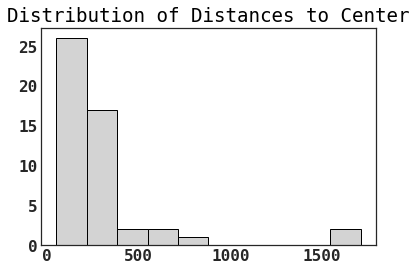

In [1241]:
x = dataframe_filtered['distance']
plt.hist(x, bins = 10, color=['lightgray'], edgecolor = 'black')
plt.title("Distribution of Distances to Center")
plt.show()

In [1242]:
from scipy.stats import median_absolute_deviation
from scipy import stats 
mn = (x.mean())
med = (x.median())
St_Dev = np.around(x.std())
MAD = np.around(median_absolute_deviation(x))
IQR = np.around(stats.iqr(x, interpolation = 'midpoint'))
print('Mean =', mn)
print('Median = ', med)
print('Standard Deviation =', St_Dev)
print('Median Absolute Deviation =', MAD)
print('Inter-Quartile Range =', IQR)

Mean = 269.28
Median =  161.0
Standard Deviation = 340.0
Median Absolute Deviation = 160.0
Inter-Quartile Range = 281.0


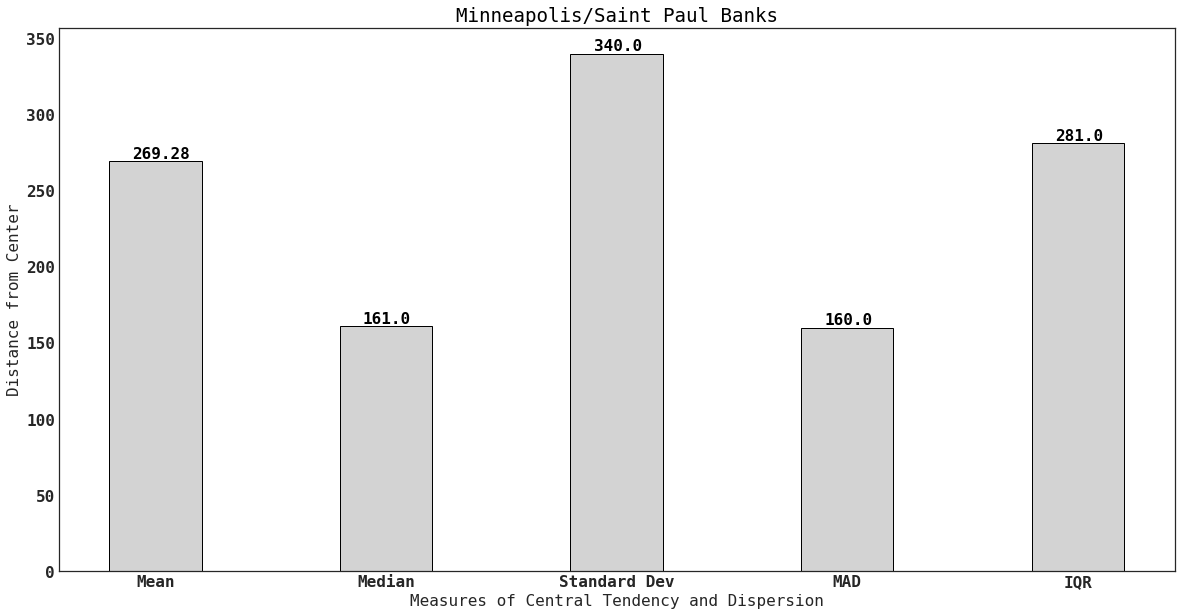

In [1243]:
measures = ('Mean', "Median", "Standard Dev", "MAD", "IQR")
values = (mn, med, St_Dev, MAD, IQR)

plt.figure(figsize=(20,10)) 
bars = plt.bar(measures, height=values, width=.4, color=['lightgray'], edgecolor = 'black')

font = {'family' : 'monospace',
        'size'   : 16}
matplotlib.rcParams['text.color'] = 'black'

matplotlib.rc('font', **font)


xlocs, xlabs = plt.xticks()

# reference x so you don't need to change the range each time x changes
xlocs=[i for i in measures]
xlabs=[i for i in measures]

plt.xlabel('Measures of Central Tendency and Dispersion')
plt.ylabel('Distance from Center')
plt.title("Minneapolis/Saint Paul Banks")
plt.xticks(xlocs, xlabs)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.1, yval + .01, yval, ha='left', va='bottom')
    

***
***
***

## Compare all four distance test results

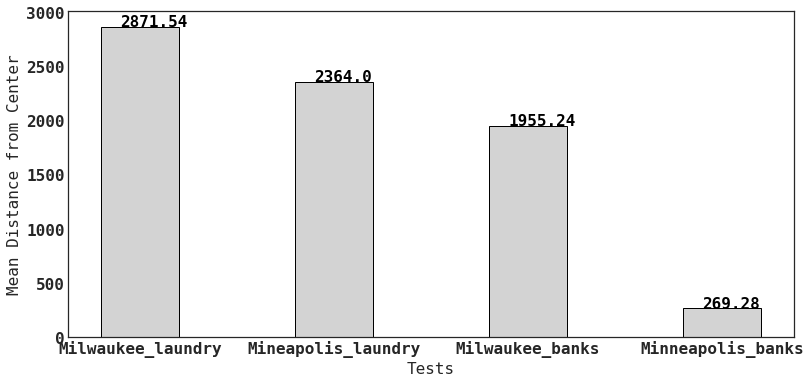

In [1244]:
site = ('Milwaukee_laundry', "Mineapolis_laundry", "Milwaukee_banks", "Minneapolis_banks")
mean_distance = (2871.54, 2364.0, 1955.24, 269.28)

plt.figure(figsize=(13,6))
bars = plt.bar(site, height=mean_distance, width=.4, color=['lightgray'], edgecolor = 'black')

           
plt.xlabel('Tests')
plt.ylabel('Mean Distance from Center')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.1, yval + .005, yval)
plt.show()



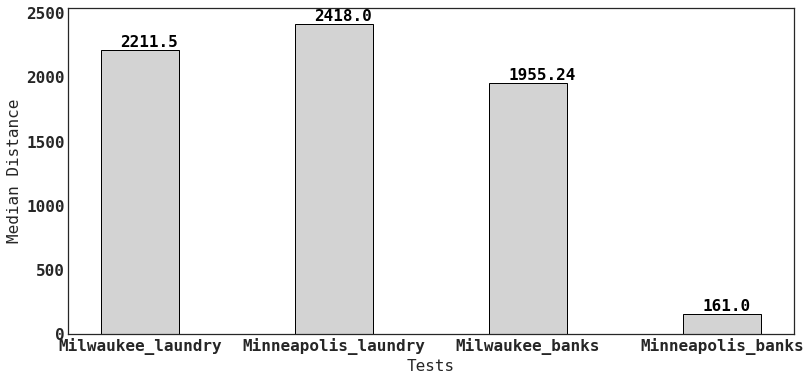

In [1245]:
site = ('Milwaukee_laundry', "Minneapolis_laundry", "Milwaukee_banks", "Minneapolis_banks")
median_distance = (2211.5, 2418.0, 1955.24, 161.0)

plt.figure(figsize=(13,6)) 
bars = plt.bar(site, height=median_distance, width=.4, color=['lightgray'], edgecolor = 'black')


plt.xlabel('Tests')
plt.ylabel('Median Distance')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.1, yval + .005, yval, ha='left', va='bottom')
plt.show()

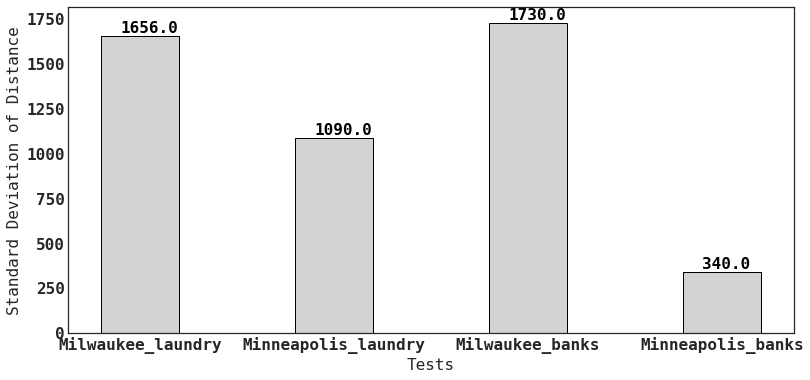

In [1246]:
site = ('Milwaukee_laundry', "Minneapolis_laundry", "Milwaukee_banks", "Minneapolis_banks")
StDev_distance = (1656.0, 1090.0, 1730.0, 340.0)

plt.figure(figsize=(13,6)) 
bars = plt.bar(site, height=StDev_distance, width=.4, color=['lightgray'], edgecolor = 'black')

plt.xlabel('Tests')
plt.ylabel('Standard Deviation of Distance')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.1, yval + .005, yval, ha='left', va='bottom')
plt.show()

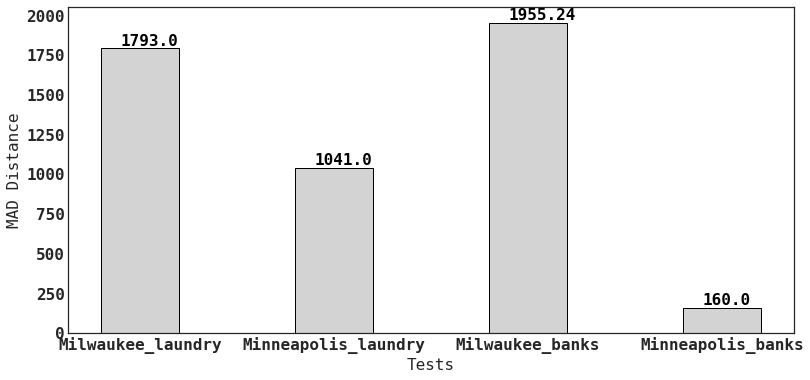

In [1247]:
site = ('Milwaukee_laundry', "Minneapolis_laundry", "Milwaukee_banks", "Minneapolis_banks")
MAD_distance = (1793.0, 1041.0, 1955.24, 160.0)

plt.figure(figsize=(13,6)) 
bars = plt.bar(site, height=MAD_distance, width=.4, color=['lightgray'], edgecolor = 'black')

plt.xlabel('Tests')
plt.ylabel('MAD Distance')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.1, yval + .005, yval, ha='left', va='bottom')
plt.show()

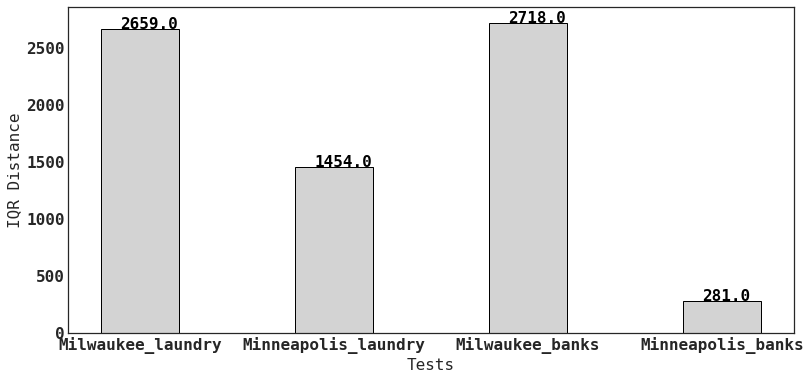

In [1248]:
site = ('Milwaukee_laundry', "Minneapolis_laundry", "Milwaukee_banks", "Minneapolis_banks")
IQR_distance = (2659.0, 1454.0, 2718.0, 281.0)

plt.figure(figsize=(13,6)) 
bars = plt.bar(site, height=IQR_distance, width=.4, color=['lightgray'], edgecolor = 'black')

plt.xlabel('Tests')
plt.ylabel('IQR Distance')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.1, yval + .05, yval)
plt.show()